In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
from  partie1 import GRUEncoder, GRUDecoder
from partie1 import LSTMEncoder, LSTMDecoder
from partie1 import TensorProductEncoder

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
##### entiers 0-10 
def generate_data(batch_size, seq_len, min_val=0, max_val=10):
    return torch.randint(min_val, max_val, (batch_size, seq_len))

def precision(predicted, target):
    correct = (predicted.argmax(dim=-1) == target).float()
    return correct.mean().item() * 100

# **GRU**

## TRAIN

Epoch [10/50000], Loss: 2.3036, Accuracy: 10.63%
Epoch [20/50000], Loss: 2.2967, Accuracy: 14.37%
Epoch [30/50000], Loss: 2.2943, Accuracy: 15.00%
Epoch [40/50000], Loss: 2.3068, Accuracy: 8.12%
Epoch [50/50000], Loss: 2.3030, Accuracy: 9.38%
Epoch [60/50000], Loss: 2.3090, Accuracy: 5.62%
Epoch [70/50000], Loss: 2.3065, Accuracy: 7.50%
Epoch [80/50000], Loss: 2.3027, Accuracy: 13.12%
Epoch [90/50000], Loss: 2.3035, Accuracy: 10.00%
Epoch [100/50000], Loss: 2.3027, Accuracy: 10.00%
Epoch [110/50000], Loss: 2.3002, Accuracy: 10.63%
Epoch [120/50000], Loss: 2.3011, Accuracy: 9.38%
Epoch [130/50000], Loss: 2.2962, Accuracy: 13.12%
Epoch [140/50000], Loss: 2.2874, Accuracy: 13.75%
Epoch [150/50000], Loss: 2.2919, Accuracy: 15.62%
Epoch [160/50000], Loss: 2.2666, Accuracy: 13.75%
Epoch [170/50000], Loss: 2.2643, Accuracy: 14.37%
Epoch [180/50000], Loss: 2.2606, Accuracy: 14.37%
Epoch [190/50000], Loss: 2.2464, Accuracy: 16.25%
Epoch [200/50000], Loss: 2.2131, Accuracy: 15.00%
Epoch [210/500

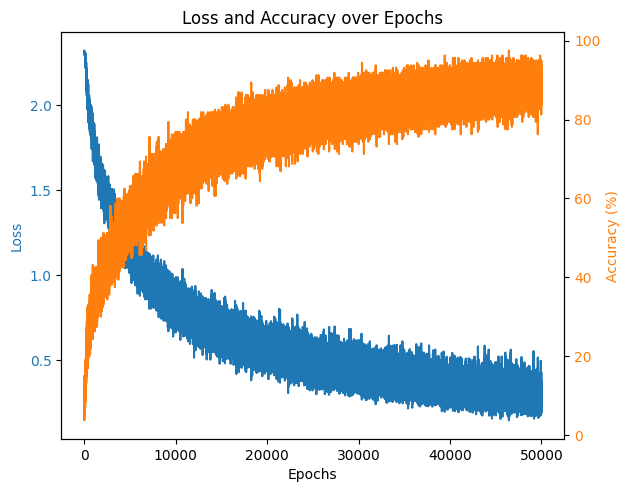

In [14]:

input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 16
seq_len = 10
epochs = 50000
learning_rate = 0.001

encoder = GRUEncoder(input_size, emb_size, hidden_size)
decoder = GRUDecoder(emb_size, hidden_size, output_size)
# decoder = torch.load("./models/gru_dec.pth")

criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss mieux adapté pour des classes discrètes
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

losses = []
accuracies = []

for epoch in range(epochs):
    x = generate_data(batch_size, seq_len)
    target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    loss = criterion(reconstructed_x.view(-1, output_size), target.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = precision(reconstructed_x, target)
    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")


# torch.save(encoder.state_dict(), "./models/gru_enc.pth")
# torch.save(decoder.state_dict(), "./models/gru_dec.pth")


torch.save(encoder, "./models/gru_enc.pth")

torch.save(decoder, "./models/gru_dec.pth")


fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(range(epochs), losses, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:orange')  
ax2.plot(range(epochs), accuracies, color='tab:orange', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:orange')


fig.tight_layout()  
plt.title('Loss and Accuracy over Epochs')

plt.savefig(f"./training_gru_{epochs}_epochs.png")
plt.show()




## EVAL

/tmp/ipykernel_4847/1624256816.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/gru_enc.pth")
/tmp/ipykernel_4847/1624256816.py:2: FutureWa

88.87774996519089


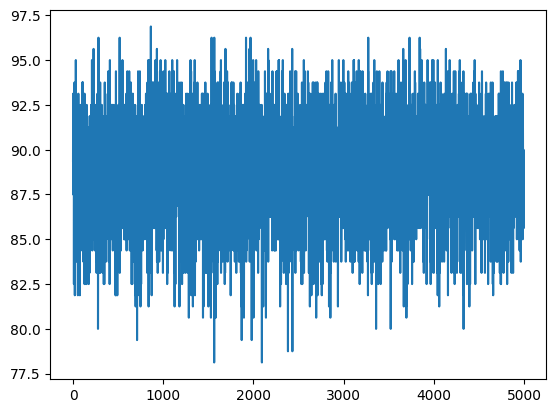

In [22]:
encoder = torch.load("./models/gru_enc.pth")
decoder = torch.load("./models/gru_dec.pth")

encoder.eval()
decoder.eval()

n_iter = 5000
accuracies = []
for _ in range(n_iter):
    x = generate_data(batch_size, seq_len)
    # print(x)
    # target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    accuracy = precision(reconstructed_x, x)

    accuracies.append(accuracy)


plt.plot(accuracies)
print(np.array(accuracies).mean())

# **LSTM**

## TRAIN

Epoch [10/50000], Loss: 2.3066, Accuracy: 8.12%
Epoch [20/50000], Loss: 2.3022, Accuracy: 8.75%
Epoch [30/50000], Loss: 2.3021, Accuracy: 10.63%
Epoch [40/50000], Loss: 2.3056, Accuracy: 8.75%
Epoch [50/50000], Loss: 2.3033, Accuracy: 11.25%
Epoch [60/50000], Loss: 2.3064, Accuracy: 8.75%
Epoch [70/50000], Loss: 2.3015, Accuracy: 11.87%
Epoch [80/50000], Loss: 2.3045, Accuracy: 7.50%
Epoch [90/50000], Loss: 2.3000, Accuracy: 13.12%
Epoch [100/50000], Loss: 2.3052, Accuracy: 8.12%
Epoch [110/50000], Loss: 2.3017, Accuracy: 12.50%
Epoch [120/50000], Loss: 2.3012, Accuracy: 11.87%
Epoch [130/50000], Loss: 2.3082, Accuracy: 5.62%
Epoch [140/50000], Loss: 2.2992, Accuracy: 11.25%
Epoch [150/50000], Loss: 2.3027, Accuracy: 10.63%
Epoch [160/50000], Loss: 2.2926, Accuracy: 13.75%
Epoch [170/50000], Loss: 2.2755, Accuracy: 18.13%
Epoch [180/50000], Loss: 2.2673, Accuracy: 14.37%
Epoch [190/50000], Loss: 2.2705, Accuracy: 11.25%
Epoch [200/50000], Loss: 2.2671, Accuracy: 15.00%
Epoch [210/50000

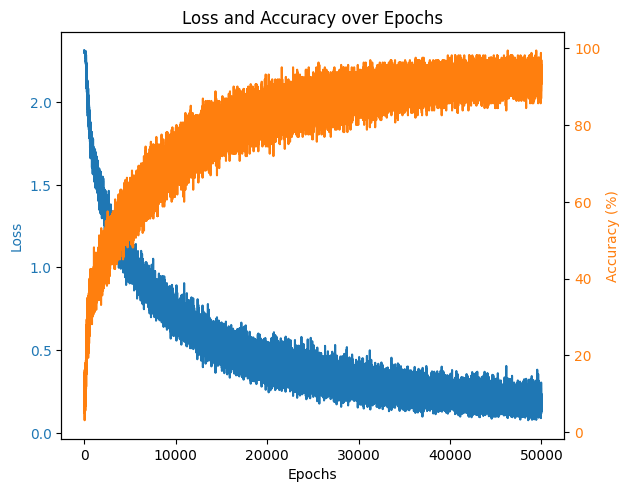

In [15]:
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 16
seq_len = 10
epochs = 50000
learning_rate = 0.001

encoder = LSTMEncoder(input_size, emb_size, hidden_size)
decoder = LSTMDecoder(emb_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss mieux adapté pour des classes discrètes
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

losses = []
accuracies = []
for epoch in range(epochs):
    x = generate_data(batch_size, seq_len)
    target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    loss = criterion(reconstructed_x.view(-1, output_size), target.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = precision(reconstructed_x, target)
    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")


torch.save(encoder, "./models/lstm_enc.pth")

torch.save(decoder, "./models/lstm_dec.pth")


fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(range(epochs), losses, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:orange')  
ax2.plot(range(epochs), accuracies, color='tab:orange', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:orange')


fig.tight_layout()  
plt.title('Loss and Accuracy over Epochs')

plt.savefig(f"./training_lstm_{epochs}_epochs.png")
plt.show()



## EVAL

/tmp/ipykernel_4847/1528415794.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/lstm_enc.pth")
/tmp/ipykernel_4847/1528415794.py:2: FutureW

93.14937499523163


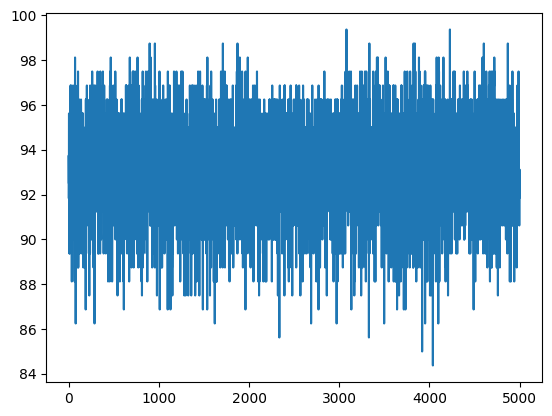

In [23]:
encoder = torch.load("./models/lstm_enc.pth")
decoder = torch.load("./models/lstm_dec.pth")

encoder.eval()
decoder.eval()

n_iter = 5000
accuracies = []
for _ in range(n_iter):
    x = generate_data(batch_size, seq_len)
    # print(x)
    # target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    accuracy = precision(reconstructed_x, x)

    accuracies.append(accuracy)


plt.plot(accuracies)
print(np.array(accuracies).mean())

# **TPDN**

## TRAIN

/Users/baptistechachura/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1, 32])) that is different to the input size (torch.Size([1, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


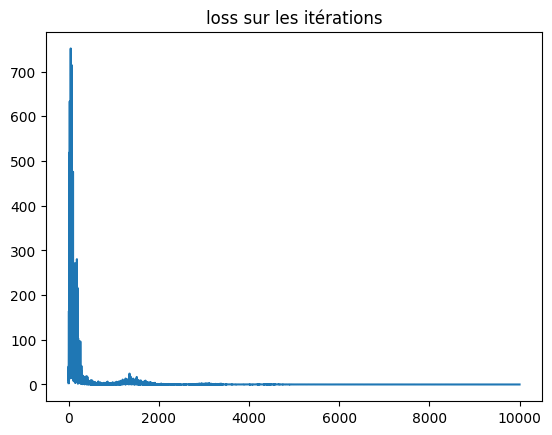

In [20]:
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 1
seq_len = 10
epochs = 10000
learning_rate = 0.01
seq_len_tensor = torch.tensor([seq_len])


encoder = torch.load("./models/gru_enc.pth")
tpdnencoder = TensorProductEncoder(n_roles=seq_len, n_fillers=seq_len, filler_dim=hidden_size, role_dim=hidden_size, hidden_size=hidden_size)

def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles

criterion = nn.MSELoss()
optimizer = optim.Adam(tpdnencoder.parameters(), lr=learning_rate)

encoder.eval()
tpdnencoder.train()
losses = []
for epoch in range(epochs):

    data, roles = generate_data(batch_size, seq_len, input_size)

    encoder_output = encoder(data).squeeze(0)  
    tpdn_output = tpdnencoder(data, roles) 
    # reconstructed_x = decoder(tpdn_output.unsqueeze(0), seq_len_tensor)
    loss = criterion(encoder_output, tpdn_output.unsqueeze(0))
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.save(tpdnencoder, "./models/tpdn_gru.pth")
plt.plot(losses)
plt.title("loss sur les itérations")
plt.show()


In [3]:
def plot_tensors(tensor1, tensor2, labels=("Tensor 1", "Tensor 2")):

    tensor1 = tensor1.flatten()
    tensor2 = tensor2.flatten()
    x_indices = range(len(tensor1))


    plt.figure(figsize=(10, 6))
    plt.plot(x_indices, tensor1.detach().numpy(), label=labels[0], marker='o')
    plt.plot(x_indices, tensor2.detach().numpy(), label=labels[1], marker='x')

    plt.title("Comparaison des valeurs des tenseur en fonction de l'indice")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

tensor([[2, 2, 8, 4, 6, 6, 6, 7, 0, 5]])


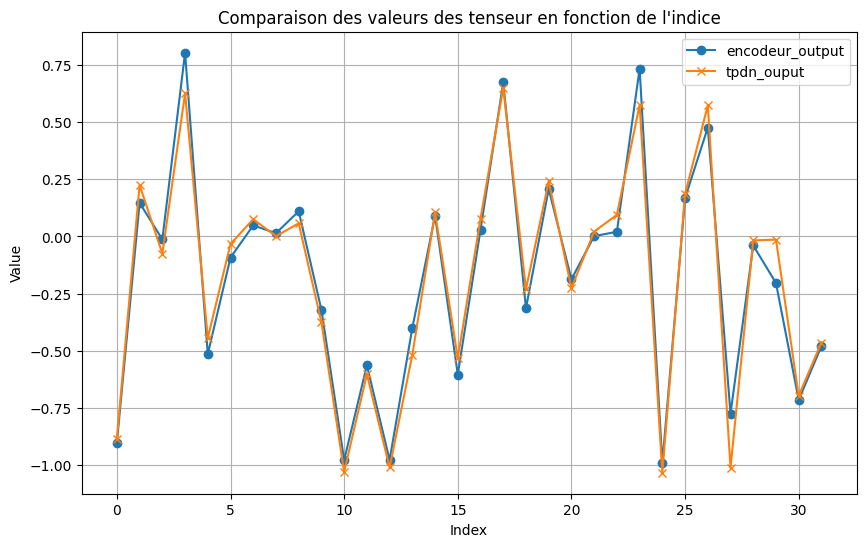

In [6]:
encoder = torch.load("./models/gru_enc.pth")
tpdnencoder = torch.load("./models/tpdn_gru.pth")
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 1
seq_len = 10
epochs = 10000
learning_rate = 0.01
seq_len_tensor = torch.tensor([seq_len])

def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles

data2, roles2 = generate_data(batch_size, seq_len, input_size)
encoder_output2 = encoder(data2).squeeze(0)  
tpdn_output2 = tpdnencoder(data2, roles2) 
print(data2)
plot_tensors(encoder_output2, tpdn_output2, labels = ("encodeur_output","tpdn_ouput"))
